## **Importing Libraries**

Importing libraries that will be used in this notebook.


In [ ]:
import sys
!{sys.executable} -m pip install pandas-profiling

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting graphs and chaarts
import seaborn as sns #drawing statistical graphics
%matplotlib inline
import pandas_profiling as pp
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

# **Color Palettes**

 This section will create some color palettes that will be used in this notebook.

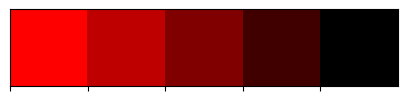

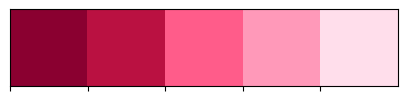

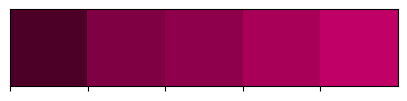

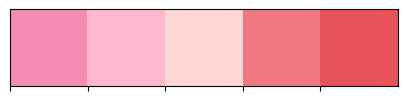

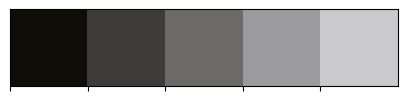

In [4]:
# --- Create List of Color Palletes ---
red_grad = ['#FF0000', '#BF0000', '#800000', '#400000', '#000000']
pink_grad = ['#8A0030', '#BA1141', '#FF5C8A', '#FF99B9', '#FFDEEB']
purple_grad = ['#4C0028', '#7F0043', '#8E004C', '#A80059', '#C10067']
color_mix = ['#F38BB2', '#FFB9CF', '#FFD7D7', '#F17881', '#E7525B']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(red_grad)
sns.palplot(pink_grad)
sns.palplot(purple_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

## **Reading Dataset**
After importing libraries, the dataset that will be used will be imported.

In [5]:
# --- Importing Dataset ---
gold_data = pd.read_csv("/content/gld_price_data.csv")

# --- Reading Dataset ---
gold_data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

<ipython-input-5-28b7335ca329>:5: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  gold_data.head().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


Date,SPX,GLD,USO,SLV,EUR/USD
1/2/2008,1447.160034,84.860001,78.470001,15.180000,1.471692
1/3/2008,1447.160034,85.570000,78.370003,15.285000,1.474491
1/4/2008,1411.630005,85.129997,77.309998,15.167000,1.475492
1/7/2008,1416.180054,84.769997,75.500000,15.053000,1.468299
1/8/2008,1390.189941,86.779999,76.059998,15.590000,1.557099


In [6]:
 gold_data.isna().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
gold_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()

<ipython-input-7-a9737ed58cd8>:1: FutureWarning: this method is deprecated in favour of `Styler.hide(axis="index")`
  gold_data.describe().style.background_gradient(cmap='Reds').set_properties(**{'font-family': 'Segoe UI'}).hide_index()


SPX,GLD,USO,SLV,EUR/USD
2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
1654.315776,122.732875,31.842221,20.084997,1.283653
519.111540,23.283346,19.523517,7.092566,0.131547
676.530029,70.000000,7.960000,8.850000,1.039047
1239.874969,109.725000,14.380000,15.570000,1.171313
1551.434998,120.580002,33.869999,17.268500,1.303297
2073.010070,132.840004,37.827501,22.882500,1.369971
2872.870117,184.589996,117.480003,47.259998,1.598798


In [8]:
# --- Print Dataset Info ---
print('\033[1m'+'.: Dataset Info :.'+'\033[0m')
print('*' * 30)
print('Total Rows:'+'\033[1m', gold_data.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', gold_data.shape[1])
print('\033[0m'+'*' * 30)
print('\n')

# --- Print Dataset Detail ---
print('\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('*' * 30)
gold_data.info(memory_usage = False)

.: Dataset Info :.
******************************
Total Rows: 2290
Total Columns: 6
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)

# **Pandas Profiling**
This section will focused on Pandas profiling before applying ML models.

In [9]:
pp.ProfileReport(gold_data)

Output hidden; open in https://colab.research.google.com to view.

# Joint plot

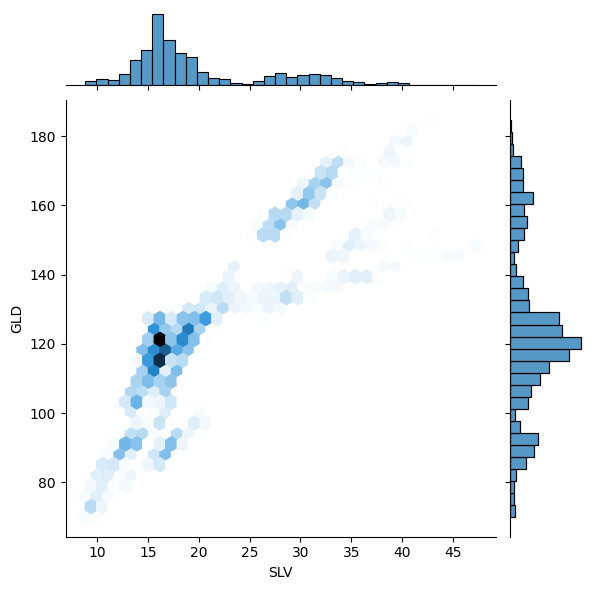

In [10]:
sns.jointplot(x='SLV',y='GLD',kind='hex',data=gold_data)

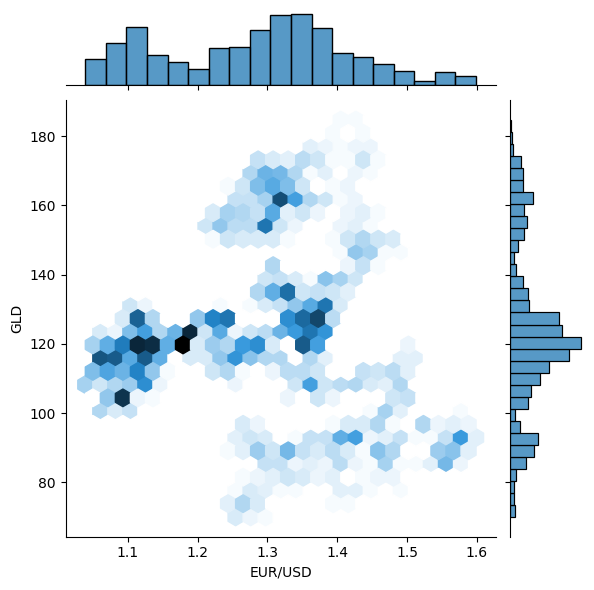

In [11]:
sns.jointplot(x='EUR/USD',y='GLD',kind='hex',data=gold_data)

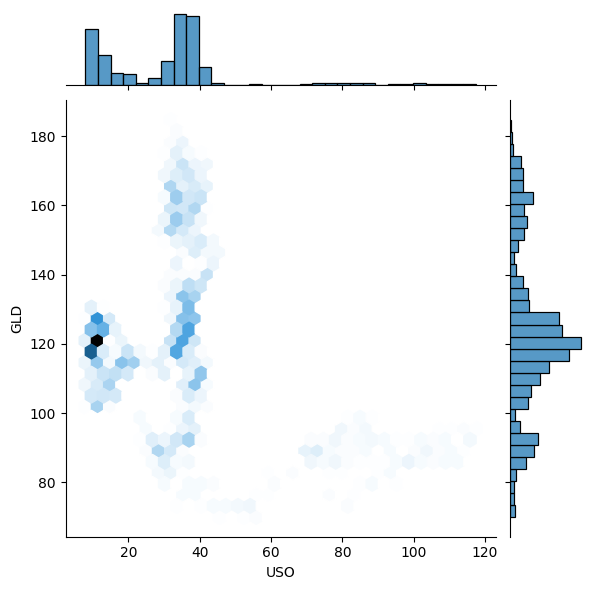

In [12]:
sns.jointplot(x='USO',y='GLD',kind='hex',data=gold_data)

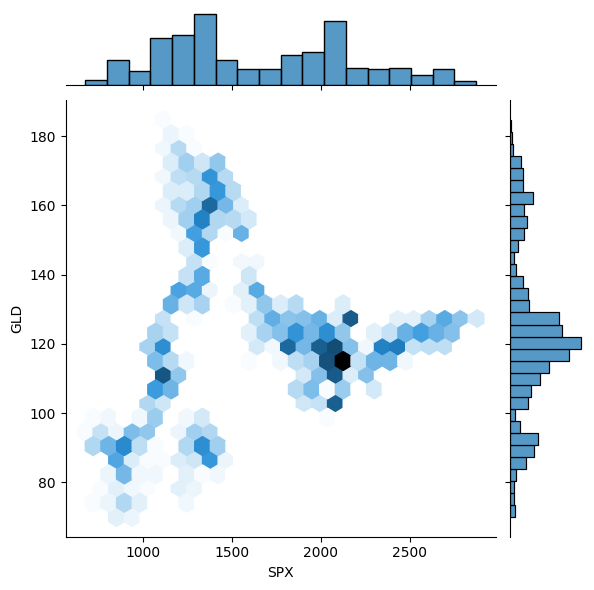

In [13]:
sns.jointplot(x='SPX',y='GLD',kind='hex',data=gold_data)

<ipython-input-14-e7b4c1ed9da3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(gold_data.corr())


<Axes: >

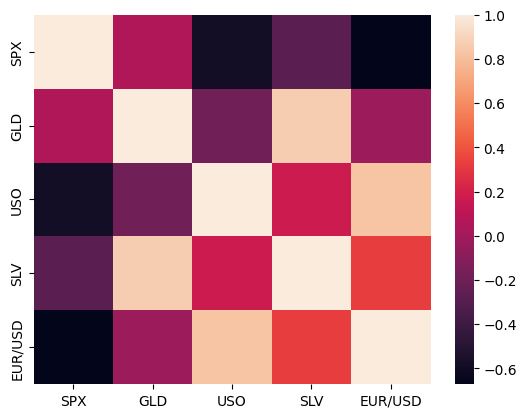

In [14]:
sns.heatmap(gold_data.corr())

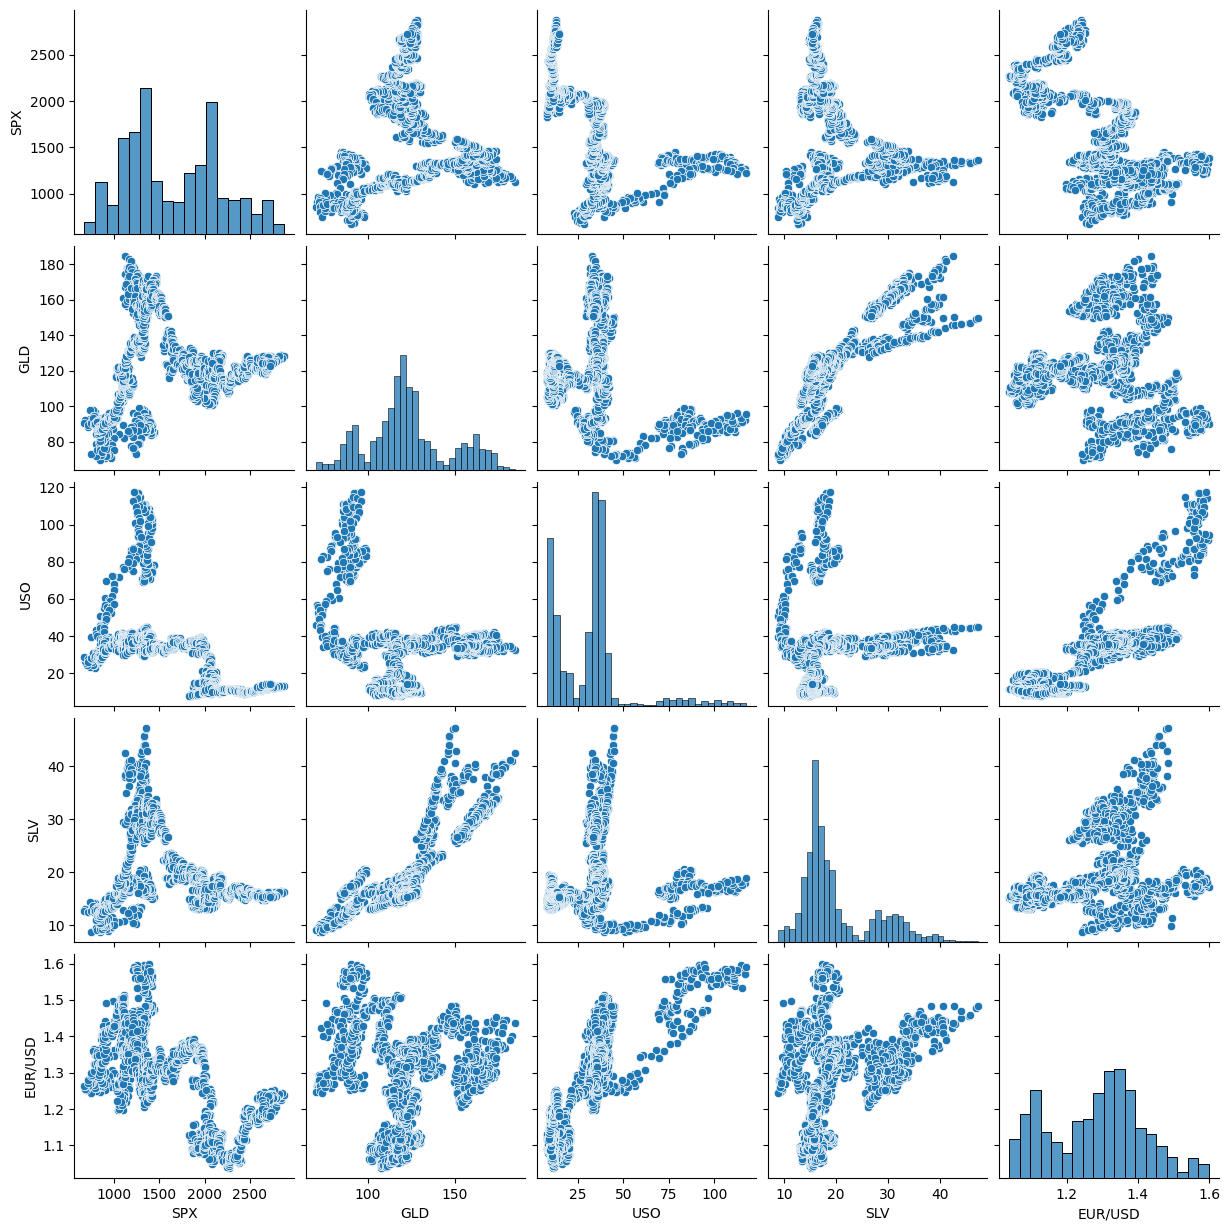

In [15]:
sns.pairplot(gold_data)

## **Auto Visualization**
This section will focused on Auto Visualization before applying ML models.

In [16]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 19.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 83.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 75.6 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of panel to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 39.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0

In [17]:
plt.figure(figsize = (10, 5))
from autoviz.AutoViz_Class import AutoViz_Class
AV = AutoViz_Class()
df_av = AV.AutoViz('/content/gld_price_data.csv')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [18]:
correlation = gold_data.corr()

In [19]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

<Axes: >

In [20]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [21]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

<Axes: xlabel='GLD', ylabel='Density'>

## **Split Data**

In [22]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [23]:
print(X)

          SPX         USO       SLV     EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [24]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

## **Model Implementation**
This section will implement various machine learning models as mentioned in Introduction section. In addition, explanation for each models will be discussed.

**Random Forest**

Random Forest is a tree-based machine learning algorithm that leverages the power of multiple decision trees for making decisions. Each individual tree in the random forest spits out a class prediction and the class with the most votes becomes our model’s prediction. A large number of relatively uncorrelated models (trees) operating as a committee will outperform any of the individual constituent models.

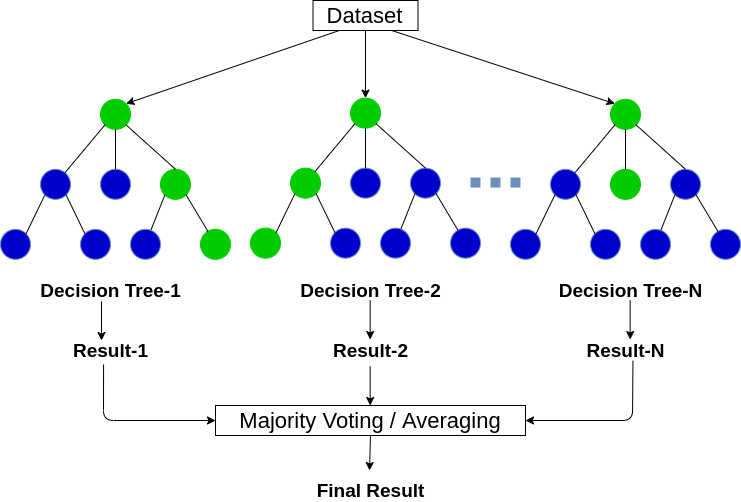

In [26]:
regressor = RandomForestRegressor(n_estimators=100)

In [27]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [28]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [29]:
print(test_data_prediction)

[168.5949994   82.06610001 116.02829992 127.63120074 120.62970126
 154.83459765 150.6137989  126.30240008 117.48869895 126.04490089
 116.58860105 172.08340104 142.20939837 168.07429868 115.0666998
 117.4967005  139.51200319 170.06580042 159.8676031  160.86949911
 155.05930045 125.2792004  176.1432002  157.59190323 125.21020032
  93.6228995   76.95350008 120.71660004 119.07249902 167.45450132
  88.21520019 125.22350021  91.15150081 117.82229981 121.21539915
 135.88650109 115.23400144 115.20030077 146.41050033 107.21440105
 104.48280254  87.46349817 126.41130117 117.94909984 153.03449909
 119.6166002  108.45599977 108.03879782  93.20810051 127.06729781
  74.94840036 113.56749949 121.43239993 111.13819894 118.88159892
 121.04459931 159.43449949 166.9760005  147.0626968   85.92659881
  94.44850028  86.86619844  90.59030012 118.96750062 126.36110076
 127.5695     169.45669949 122.23469947 117.32389873  98.37610016
 168.47780081 143.47369906 131.88220178 121.2193024  120.93369954
 120.054500

In [30]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9894510405046517


In [31]:
Y_test = list(Y_test)

In [32]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

## **Decision Tree**
A Decision Tree is a popular machine learning algorithm used for both classification and regression tasks. It works by recursively splitting the dataset into subsets based on the most significant attribute or feature at each step, ultimately forming a tree-like structure where the leaves represent the class labels or regression values.

Predicting gold prices using a decision tree model involves several steps, including data preprocessing, model training, and making predictions. Below, I'll provide you with a Python code example using the scikit-learn library to create a decision tree model for gold price prediction. Note that you'll need to have the scikit-learn library installed to run this code.

In [33]:
# Create a Decision Tree Regressor model

tree_model = DecisionTreeRegressor(random_state=42)

In [34]:
# Fit the model to the training data
tree_model.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [35]:
# Make predictions on the test set
test_data_prediction = tree_model.predict(X_test)

In [36]:
print(test_data_prediction)

[168.5       86.089996 114.769997 127.779999 121.190002 155.669998
 149.149994 126.809998 117.389999 125.620003 117.410004 174.580002
 142.149994 167.179993 115.839996 116.5      134.100006 168.5
 159.570007 132.850006 155.360001 125.699997 177.210007 157.339996
 125.459999  93.559998  77.559998 122.290001 119.220001 167.869995
  87.370003 124.769997  91.730003 117.919998 121.269997 136.050003
 114.57     115.800003 134.119995 105.720001 104.370003  87.239998
 127.489998 118.769997 157.779999 120.120003 107.980003 107.519997
  93.800003 128.539993  73.300003 113.260002 120.110001 110.809998
 118.360001 120.730003 161.320007 161.020004 146.869995  85.199997
  93.459999  86.879997  91.980003 119.800003 126.139999 127.419998
 172.229996 122.970001 116.209999  97.699997 169.820007 141.899994
 132.490005 120.910004 122.739998 119.190002 113.910004 118.82
 106.260002 127.440002 114.209999 108.470001 115.57     119.699997
  89.910004  87.989998 142.380005 127.150002 114.209999 109.32
 108.279

In [46]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.983899584044299


In [47]:
# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, test_data_prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 8.492059753654004


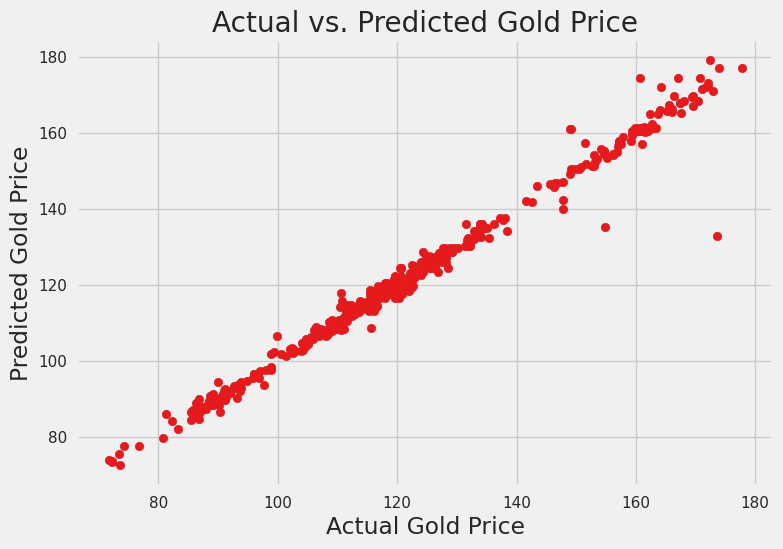

In [43]:
# Plot the actual vs. predicted values for visualization
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Gold Price")
plt.ylabel("Predicted Gold Price")
plt.title("Actual vs. Predicted Gold Price")
plt.show()

In [49]:
# Now you can use the trained model to make predictions for future gold prices
# You can provide new input data in the same format as your training data

# Example prediction for a new data point
new_data_point = np.array([[84.860001	,78.470001	,15.180000	,1.471692]])  # Replace with your new feature values
predicted_price = tree_model.predict(new_data_point)
print(f"Predicted Gold Price: {predicted_price[0]}")

Predicted Gold Price: 86.089996


## **Linear Regression**

In [51]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [52]:
# Make predictions on the test set
test_data_prediction = model.predict(X_test)

In [ ]:
print(test_data_prediction)

In [54]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.8657886565869237


In [55]:
# Calculate the Mean Squared Error (MSE) to evaluate the model's performance
mse = mean_squared_error(Y_test, test_data_prediction)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 70.7889007972153


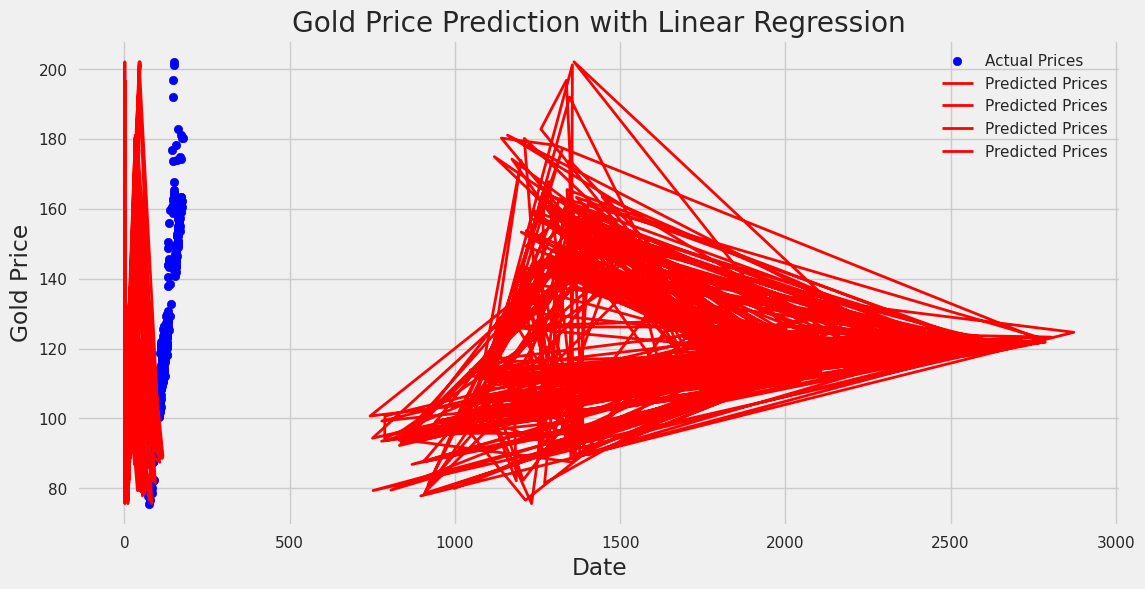

In [58]:
# Plot the results
plt.figure(figsize=(12, 6))
plt.scatter(Y_test, test_data_prediction, color='blue', label='Actual Prices')
plt.plot(X_test, test_data_prediction, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Gold Price')
plt.legend()
plt.title('Gold Price Prediction with Linear Regression')
plt.show()